![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

---
##### **- Presentado por: Daniela Uscátegui Bernal**
---


# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier



In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos

print("* Dimensiones del DataFrame descargado:")
print("  - Número de filas:",bikes.shape[0])
print("  - Número de columnas:", bikes.shape[1],"\n")

tipos_de_datos = bikes.dtypes.value_counts()
print("\n* Conteo de tipos de datos:")
print(tipos_de_datos,"\n")

print("----------------------------")
print("* Head and Tail del DF")
print("----------------------------")
display(bikes)

* Dimensiones del DataFrame descargado:
  - Número de filas: 10886
  - Número de columnas: 12 


* Conteo de tipos de datos:
int64      8
float64    3
int32      1
Name: count, dtype: int64 

----------------------------
* Head and Tail del DF
----------------------------


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

---

***Análisis:** Con la información del diccionario sabemos que (1) Invierno, (2) Primavera, (3) Verano y (4) Otoño, por lo tanto, se pude decir que el promedio de alquileres de las bicicletas tiende a ser más alto en la Primavera y el Verano, lo cual tiene lógica ya que el clima en esas estaciones es mas agradable para estar al aire libre. Invierno por su parte es lógico que sea el más bajo ya que las temperaturas bajan y dependiendo del estado va a haber nieve, lo que dificulta el uso de las mismaas.

---

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

---

***Análisis:**  Se puede identificar fácilmente que entre las 11pm y las 6am, el uso de las bicicletas disminuye (tiene sentido ya que es la noche y la mayoria de la poblacion probablemente está en sus hogares). El uso durante el día tambiên aumenta, pero podemos ver que hay "horas pico", en la manana entre 8-9am y en la tarde entre 5-7pm, esto podria ser debido a que son las horas estandares de entrada y salida de colegios, universidades y trabajos.

---

In [6]:
# Celda 1.3. Anâlisis de Estadísticas Descriptivas
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


---
***Análisis:** De la tabla de estadísticas descriptivas se puede concluir que en general, los datos presentan una amplia variabilidad. Por ejemplo: 
* El promedio del total de alquileres es de 191.57 bicicletas, con una desviación estándar significativa de 181.14, lo que indica una amplia variabilidad que se puede comprobar viendo los valores de los extremo, con un mínimo de 1 hasta un máximo de 977.
* La gran variabilidad en variables como "total", "hour", "season", "temp", "humidity" y "windspeed" van a ser importantes para la construcción del modelo ya que al parecer capturan patrones o tendencias que pueden influir en el alquiler de las bicicletas.
---

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

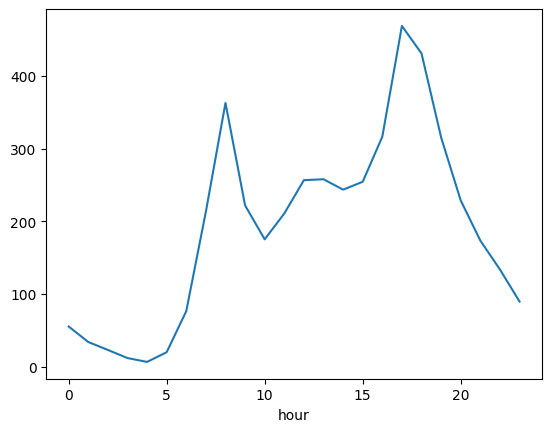

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

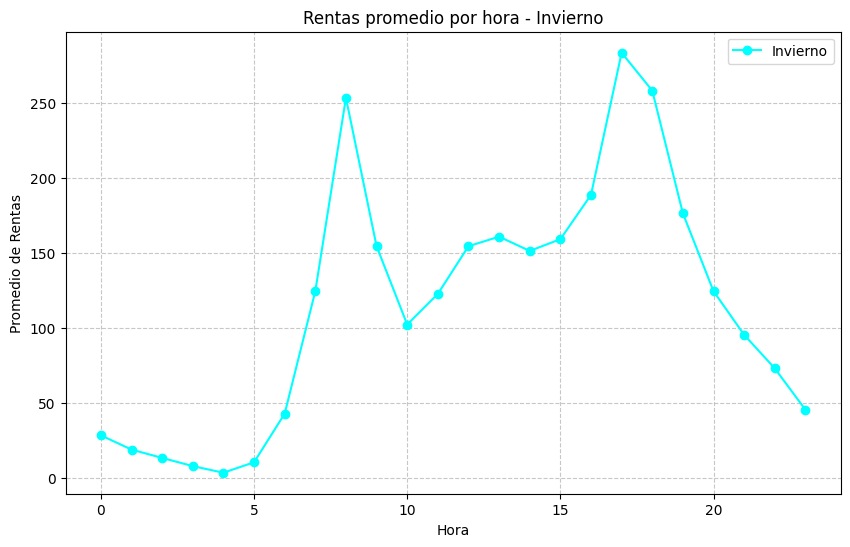

hour
0      28.292035
1      18.761062
2      13.205607
3       7.760417
4       3.336634
5      10.300000
6      42.725664
7     124.433628
8     253.345133
9     154.442478
10    102.168142
11    122.601770
12    154.412281
13    160.771930
14    151.263158
15    159.087719
16    188.640351
17    283.456140
18    258.157895
19    176.315789
20    124.394737
21     95.298246
22     72.912281
23     45.333333
Name: total, dtype: float64

In [8]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

invierno = bikes[bikes['season'] == 1].groupby('hour').total.mean()

plt.figure(figsize=(10, 6))
plt.plot(invierno.index, invierno.values, color='cyan', marker='o', linestyle='-', label='Invierno')
plt.title('Rentas promedio por hora - Invierno')
plt.xlabel('Hora')
plt.ylabel('Promedio de Rentas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

bikes[bikes['season'] == 1].groupby('hour').total.mean()


---

***Análisis - Invierno:**  Se evidencia gráficamente que el alquiler de bicicletas en el invierno es más bajas en todas las horas del día, pero se mantiene un comportamiento similar que en la gráfica principal (lo que asumimos como horas pico). Se observa que despues de las 5pm (17) hasta las 4am (8 bicicletas), el alquiler disminuye, obteniendo su punto mas bajo a las 4am y empieza a aumentar a las 5am, llegando a su pulto mas alto de la manana a las 8am (253 bicicletas), luego empieza a bajar, pero a las 10am se empieza a ver un aumento de nuevo. En la tarde, el pico mas alto se da a las 5pm (283 bicicletas).

---

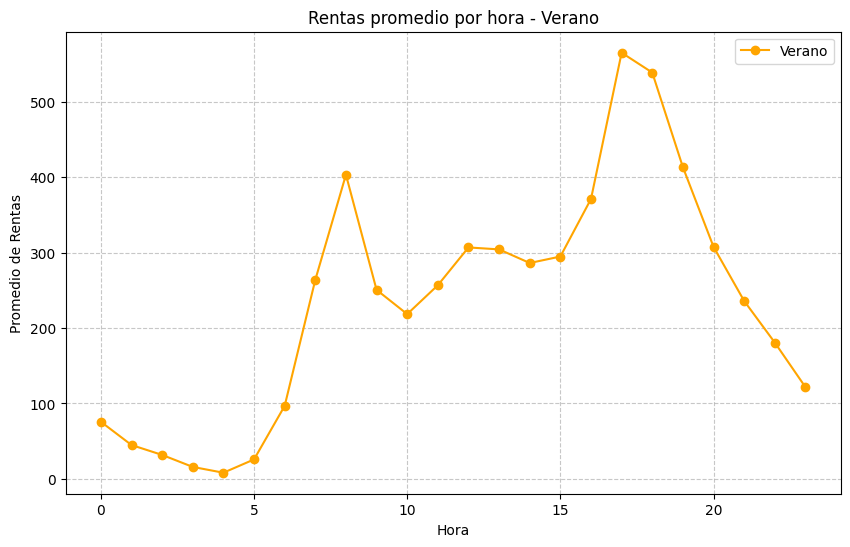

hour
0      75.675439
1      44.831858
2      31.707965
3      15.778761
4       8.087719
5      25.728070
6      96.780702
7     264.035088
8     403.508772
9     250.710526
10    218.535088
11    256.877193
12    307.017544
13    304.421053
14    286.350877
15    294.956140
16    371.324561
17    565.385965
18    539.070175
19    413.500000
20    307.842105
21    236.017544
22    180.789474
23    121.719298
Name: total, dtype: float64

In [9]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 

verano = bikes[bikes['season'] == 3].groupby('hour').total.mean()

plt.figure(figsize=(10, 6))
plt.plot(verano.index, verano.values, color='orange', marker='o', linestyle='-', label='Verano')
plt.title('Rentas promedio por hora - Verano')
plt.xlabel('Hora')
plt.ylabel('Promedio de Rentas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

bikes[bikes['season'] == 3].groupby('hour').total.mean()


---

***Análisis - Verano:** En este caso se observa de nuevo que se mantienem las tendencias en las horas pico, la gráfica pareciera igual a la de invierno y a la general, sin embargo, se evidencia gráficamente que el alquiler durante el verano aumenta en general. Se observa que despues de las 5pm (17) hasta las 4am, el alquiler disminuye, obteniendo su punto mas bajo a las 4am (8 bicicletas) y empieza a aumentar a las 5am, llegando a su pulto mas alto de la manana a las 8am (403 bicicletas), luego empieza a bajar, pero a las 10am se empieza a ver un aumento de nuevo. En la tarde, el pico mas alto se da a las 5pm (565 bicicletas).

---

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a un conjunto de train de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [10]:
# Celda 3

#Codigo base Linear Regression Intro ML - W1 - MIAD 2025-11

# Definir variables predictoras (X) y variable de respuesta (y)
X = bikes[['season', 'hour']]  # Variables predictoras
y = bikes['total']  # Variable de respuesta

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print(f"* Error cuadrático medio (MSE): {mse_lr}")
print(f"* Coeficiente de determinación (R²): {r2_lr}")

# Obtener los coeficientes del modelo
coeficientes = model.coef_
intercepto = model.intercept_

for i, col in enumerate(X.columns):
    print(f"* Coeficiente para {col}: {coeficientes[i]}")

* Error cuadrático medio (MSE): 27062.11039530083
* Coeficiente de determinación (R²): 0.16835080107950595
* Coeficiente para season: 27.961809001135236
* Coeficiente para hour: 10.722520110400911


---

***Análisis de Coeficientes:** 

* MSE: Es relativamente alto, lo que sugiere que el modelo tiene dificultades para capturar la variabilidad de los datos.
* R²: El modelo explica únicamente el 16.8% de la variabilidad en total.
* Coef Season: El modelo predice un aumento promedio de 27.96 bicicletas rentadaspor cada unidad de aumento en season, asumiendo que la hora sea constante. En este caso como season es categórica, significa que si en Invierno (1) se rentaron 28.29 bicicletas, en Primavera (2) se rentaran 56.25 bicicletas.
* Coef Hour: El modelo predice un aumento promedio de 10.72 bicicletas rentadas por cada unidad de aumento en hour, asumiendo que la estacion sea constante. Por ejemplo, a las 5pm (17) se espera que se renten aproximadamente 171.52 bicicletas más que a las 12am(0), manteniendo constante la estación.
* ¿Cuáles son las limitaciones de la regresión lineal en este caso? En este caso, una de las mayores limitaciones es que la RL no es adecuada para capturar relaciones no lineales, en el caso de hour y season se ve en las graficas del segundo punto que no son lineales. Ademas, no se está teniendo en cuenta la colinealidad que puede existir entre las variables predictoras y es sensible a valores extremos, como los que se tienen durante las horas pico. 

---

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [11]:
# Celda 4
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

#Crecer el árbol con una profundidad máxima de 3 para que tenga al menos 6 nodos finales. 
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree




{'y_pred': 1,
 'y_prob': np.float64(191.53903379867745),
 'level': 0,
 'split': [1, np.float64(8.0)],
 'n_samples': 10886,
 'gain': np.float64(18268.811823533004),
 'sl': {'y_pred': 1,
  'y_prob': np.float64(55.40711902113459),
  'level': 1,
  'split': [1, np.float64(7.0)],
  'n_samples': 3594,
  'gain': np.float64(7207.700659959655),
  'sl': {'y_pred': 1,
   'y_prob': np.float64(32.561604584527224),
   'level': 2,
   'split': [1, np.float64(6.0)],
   'n_samples': 3139,
   'gain': np.float64(646.8008927589567),
   'sl': {'y_pred': 1,
    'y_prob': np.float64(25.15934475055845),
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': np.float64(382.8088308604629)},
   'sr': {'y_pred': 1,
    'y_prob': np.float64(75.92778993435448),
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': np.float64(743.095592335012)}},
  'sr': {'y_pred': 1,
   'y_prob': np.float64(212.18599562363238),
   'level': 2,
   'split': [0, np.float64(2.0)],
   'n_samples': 455,
   'gain': 

In [12]:
# Contar los nodos finales del arbol
def count_leaf_nodes(tree):
    if 'split' not in tree or tree['split'] == -1:  # Nodo final
        return 1
    return count_leaf_nodes(tree['sl']) + count_leaf_nodes(tree['sr'])

# Verificar que se tengan al menos 6 nodos finales 
num_leaf_nodes = count_leaf_nodes(tree)
print(f"Número de nodos finales: {num_leaf_nodes}")

Número de nodos finales: 8


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

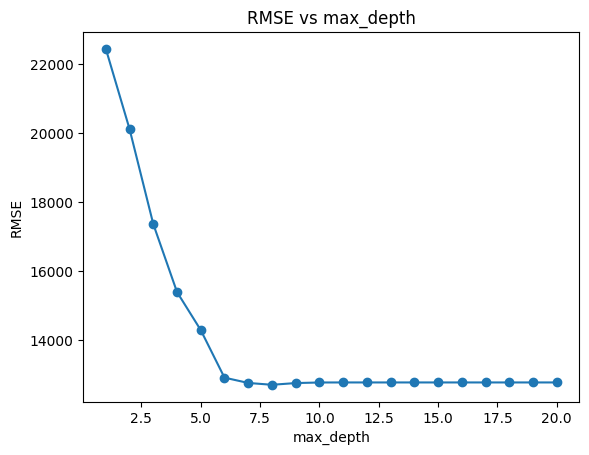

Mejor RMSE: 12704.75788316308, Mejor max_depth: 8


In [13]:
# Celda 5

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
rmse_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores = -cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    rmse_scores.append(scores.mean())


# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, rmse_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE vs max_depth')
plt.show()

# Mejor RMSE y su correspondiente max_depth
best_rmse, best_depth = min(zip(rmse_scores, max_depth_range))
print(f"Mejor RMSE: {best_rmse}, Mejor max_depth: {best_depth}")



*- Vemos que el mejor max_depth = 8, por lo tanto se ajusta el árbol a este valor.*

In [14]:
# Se ajusta un árbol usando el mejor max_depth de la gráfica anterior
reg = DecisionTreeRegressor(max_depth=8, random_state=42)
reg.fit(X_train, y_train)

# Uso de la función .feature_importances_ para obtener la importancia de cada variable
feature_importance = pd.DataFrame({'Variable': X.columns, 'Importancia': reg.feature_importances_}).sort_values(by='Importancia', ascending=False)

print(feature_importance)


# Impresión de resultados de desempeño del árbol de decisión
print("\n* Impresión de Resultados del Arbol")
print(pd.Series(cross_val_score(reg, X, y, cv=10)).describe())

# Predicciones del árbol de decisión
y_pred_tree = reg.predict(X)

# Cálculo de métricas
print("\n* Metricas del Arbol")
mse_tree = mean_squared_error(y, y_pred_tree)  
r2_tree = r2_score(y, y_pred_tree)          

print(f"  * Error Cuadrático Medio (MSE): {mse_tree}")
print(f"  * Coeficiente de Determinación (R²): {r2_tree}")

  Variable  Importancia
1     hour     0.865153
0   season     0.134847

* Impresión de Resultados del Arbol
count    10.000000
mean      0.067219
std       0.936864
min      -2.455796
25%       0.064796
50%       0.442488
75%       0.539551
max       0.645839
dtype: float64

* Metricas del Arbol
  * Error Cuadrático Medio (MSE): 12836.890487668144
  * Coeficiente de Determinación (R²): 0.6087542349986358


*- Vemos que la variable más importante es hour, lo que indica que la hora del día tiene el mayor impacto en la cantidad de bicicletas rentadas.*

In [15]:
# Crear una tabla para comparar métricas
comparison_table = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'Regresión Lineal'],
    'MSE': [mse_tree, mse_lr],
    'R²': [r2_tree, r2_lr]
})

print(comparison_table)

              Modelo           MSE        R²
0  Árbol de Decisión  12836.890488  0.608754
1   Regresión Lineal  27062.110395  0.168351


---

***Comparación con la Regresión Lineal (Punto 3):** 

* MSE: El MSE del árbol de regresión (12836.890488) es menor que el del modelo de regresión lineal (27062.11), lo que indica que el árbol tiene un error de predicción más bajo.
* R²: El R² del árbol de regresión (0.524042) es mayor que el del modelo de regresión lineal (0.1684), lo que indica que el árbol explica el 60.87% de la variabilidad en los datos.

***Conclusión:** En este caso los árboles demostraron ser una mejor opción que la regresión lineal ya que capturqa de mejor manera las relaciones no lineales y no se ve muy afectado por datos atipicos.

---

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [16]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [17]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

np.float64(0.5)

In [18]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

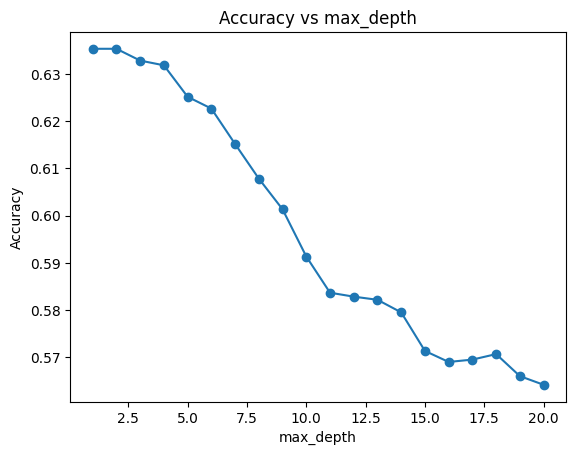

Mejor accuracy: 0.6353, Mejor max_depth: 2


In [19]:
# Celda 6
# Creación Arbol

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del accuracy para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

# Gráfica max_depth versus Accuracy
plt.plot(max_depth_range, accuracy_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth')
plt.show()

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
best_accuracy, best_depth = sorted(zip(accuracy_scores, max_depth_range))[::-1][0]
print(f"Mejor accuracy: {best_accuracy:.4f}, Mejor max_depth: {best_depth}")


In [20]:
# Ajustar el árbol con max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X, y)

# Hacer predicciones en el conjunto de prueba
y_pred_tree = clf.predict(X_test)

# Calcular Accuracy y F1-Score
accuracy_tree_cv = cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean()
f1_tree_cv = cross_val_score(clf, X, y, cv=10, scoring='f1').mean()

print(f"Accuracy del árbol de decisión: {accuracy_tree_cv:.4f}")
print(f"F1-Score del árbol de decisión: {f1_tree_cv:.4f}")

Accuracy del árbol de decisión: 0.6353
F1-Score del árbol de decisión: 0.6323


In [21]:
#Regresión Logística
# Entrenar la regresión logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Calcular el accuracy y F1-Score promedio usando validación cruzada (10 folds)
accuracy_log_cv = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy').mean()
f1_log_cv = cross_val_score(log_reg, X, y, cv=10, scoring='f1').mean()

print(f"Accuracy de la regresión logística: {accuracy_log_cv:.4f}")
print(f"F1-Score de la regresión logística: {f1_log_cv:.4f}")

Accuracy de la regresión logística: 0.6247
F1-Score de la regresión logística: 0.6101


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [22]:
# Celda 7
#7.1 Modelo 1: Arboles con max_depth

# Creación de 100 muestras de bootstrap
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples_max_depth = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

# Entrenamiento de 100 árboles con max_depth=5
trees_max_depth = {}
for i in range(n_estimators):
    trees_max_depth[i] = DecisionTreeClassifier(max_depth=5, random_state=i)
    trees_max_depth[i].fit(X_train.iloc[samples_max_depth[i]], y_train.iloc[samples_max_depth[i]])

# Predicciones de los árboles con max_depth
y_pred_max_depth = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_max_depth.iloc[:, i] = trees_max_depth[i].predict(X_test)

# Evaluación de los árboles con max_depth
y_pred_max_depth_avg = (y_pred_max_depth.sum(axis=1) >= (n_estimators / 2)).astype(np.int64)
accuracy_max_depth = accuracy_score(y_test, y_pred_max_depth_avg)
f1_max_depth = f1_score(y_test, y_pred_max_depth_avg)


In [23]:
#7.2 Modelo 2: Arboles con min_samples_leaf

# Creación de 100 muestras de bootstrap
samples_min_samples_leaf = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

# Entrenamiento de 100 árboles con min_samples_leaf=10
trees_min_samples_leaf = {}
for i in range(n_estimators):
    trees_min_samples_leaf[i] = DecisionTreeClassifier(min_samples_leaf=10, random_state=i)
    trees_min_samples_leaf[i].fit(X_train.iloc[samples_min_samples_leaf[i]], y_train.iloc[samples_min_samples_leaf[i]])

# Predicciones de los árboles con min_samples_leaf
y_pred_min_samples_leaf = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_min_samples_leaf.iloc[:, i] = trees_min_samples_leaf[i].predict(X_test)

# Evaluación de los árboles con min_samples_leaf 
y_pred_min_samples_leaf_avg = (y_pred_min_samples_leaf.sum(axis=1) >= (n_estimators / 2)).astype(np.int64) 
accuracy_min_samples_leaf = accuracy_score(y_test, y_pred_min_samples_leaf_avg) 
f1_min_samples_leaf = f1_score(y_test, y_pred_min_samples_leaf_avg)

In [24]:
#7.3 Modelo 3: Regresión Logística

# Creación de 100 muestras de bootstrap
samples_log_reg = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

# Entrenamiento de 100 regresiones logísticas
log_regs = {}
for i in range(n_estimators):
    log_regs[i] = LogisticRegression(random_state=i, max_iter=1000)
    log_regs[i].fit(X_train.iloc[samples_log_reg[i]], y_train.iloc[samples_log_reg[i]])

# Predicciones de las regresiones logísticas
y_pred_log_reg = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_log_reg.iloc[:, i] = log_regs[i].predict(X_test)

# Evaluación de las regresiones logísticas 
y_pred_log_reg_avg = (y_pred_log_reg.sum(axis=1) >= (n_estimators / 2)).astype(np.int64) 
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg_avg) 
f1_log_reg = f1_score(y_test, y_pred_log_reg_avg)



In [25]:
#7.4 Ensamblaje

# Combinar todas las predicciones
y_pred_all = pd.concat([y_pred_max_depth, y_pred_min_samples_leaf, y_pred_log_reg], axis=1)

# Votación mayoritaria con umbral n_estimators * 3 / 2
y_pred_ensamble = (y_pred_all.sum(axis=1) >= (n_estimators * 3 / 2)).astype(np.int64)

# Evaluación del ensamble
accuracy_ensemble = accuracy_score(y_test, y_pred_ensamble)
f1_ensemble = f1_score(y_test, y_pred_ensamble)


print(f"* Accuracy árboles con max_depth: {accuracy_max_depth:.4f}, F1-Score: {f1_max_depth:.4f}")
print(f"* Accuracy árboles con min_samples_leaf: {accuracy_min_samples_leaf:.4f}, F1-Score: {f1_min_samples_leaf:.4f}")
print(f"* Accuracy regresiones logísticas: {accuracy_log_reg:.4f}, F1-Score: {f1_log_reg:.4f}")
print(f"* Accuracy del ensamble: {accuracy_ensemble:.4f}, F1-Score: {f1_ensemble:.4f}")

* Accuracy árboles con max_depth: 0.6547, F1-Score: 0.6523
* Accuracy árboles con min_samples_leaf: 0.6520, F1-Score: 0.6515
* Accuracy regresiones logísticas: 0.6160, F1-Score: 0.6022
* Accuracy del ensamble: 0.6360, F1-Score: 0.6260


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [26]:
#Celda 8
#8.1 Definición del modelo BaggingClassifier de la libreria sklearn para cada ensamble
clf_max_depth = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=n_estimators, bootstrap=True,random_state=42, oob_score=True)
clf_min_samples_leaf = BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=10),n_estimators=n_estimators, bootstrap=True,random_state=43, oob_score=True)
clf_log_reg = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=n_estimators, bootstrap=True, random_state=44, oob_score=True)

#8.2 Entrenamiento de cada modelo BaggingClassifier
clf_max_depth.fit(X_train, y_train)
clf_min_samples_leaf.fit(X_train, y_train)
clf_log_reg.fit(X_train, y_train)

# 8.3 Cálculo del error OOB para cada modelo
oob_score_max_depth = clf_max_depth.oob_score_
oob_score_min_samples_leaf = clf_min_samples_leaf.oob_score_
oob_score_log_reg = clf_log_reg.oob_score_

error_max_depth = 1 - oob_score_max_depth
error_min_samples_leaf = 1 - oob_score_min_samples_leaf
error_log_reg = 1 - oob_score_log_reg

#8.4 Cálculo de los pesos alpha para cada modelo basado en el error OOB
alpha_max_depth = (1 - error_max_depth) / ((1 - error_max_depth) + (1 - error_min_samples_leaf) + (1 - error_log_reg))
alpha_min_samples_leaf = (1 - error_min_samples_leaf) / ((1 - error_max_depth) + (1 - error_min_samples_leaf) + (1 - error_log_reg))
alpha_log_reg = (1 - error_log_reg) / ((1 - error_max_depth) + (1 - error_min_samples_leaf) + (1 - error_log_reg))

# Impresión de los pesos (alpha) calculados
print("Pesos alpha basados en el error OOB:")
print(f"* Árboles con max_depth: {alpha_max_depth:.4f}")
print(f"* Árboles con min_samples_leaf: {alpha_min_samples_leaf:.4f}")
print(f"* Regresiones logísticas: {alpha_log_reg:.4f}")

#8.5 Predicción de cada modelo (usando probabilidades para votación ponderada)
y_pred_max_depth = clf_max_depth.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
y_pred_min_samples_leaf = clf_min_samples_leaf.predict_proba(X_test)[:, 1]
y_pred_log_reg = clf_log_reg.predict_proba(X_test)[:, 1]

#8.6 Votación ponderada combinando las predicciones de cada modelo
weighted_prediction = (alpha_max_depth * y_pred_max_depth + alpha_min_samples_leaf * y_pred_min_samples_leaf + alpha_log_reg * y_pred_log_reg)

#8.7 Decisión final utilizando un umbral de 0.5
y_pred_weighted_ensemble = (weighted_prediction >= 0.5).astype(int)

#8.8 Evaluación del ensamble ponderado
accuracy_weighted_ensemble = accuracy_score(y_test, y_pred_weighted_ensemble)
f1_weighted_ensemble = f1_score(y_test, y_pred_weighted_ensemble)

#8.9 Impresión de resultados del ensamble ponderado
print("\nResultados del ensamble ponderado basado en el error OOB:")
print(f"* Accuracy: {accuracy_weighted_ensemble:.4f}")
print(f"* F1-Score: {f1_weighted_ensemble:.4f}")

#8.10 Comparar resultados
# Tabla comparativa de resultados
resultados_comparacion = pd.DataFrame({
    'Modelo': ['Árboles con max_depth', 'Árboles con min_samples_leaf', 'Regresiones logísticas', 'Ensamble final (Mayoría)', 'Ensamble ponderado (OOB)'],
    'Accuracy': [accuracy_max_depth, accuracy_min_samples_leaf, accuracy_log_reg, accuracy_ensemble, accuracy_weighted_ensemble],
    'F1-Score': [f1_max_depth, f1_min_samples_leaf, f1_log_reg, f1_ensemble, f1_weighted_ensemble]
})

Pesos alpha basados en el error OOB:
* Árboles con max_depth: 0.3386
* Árboles con min_samples_leaf: 0.3332
* Regresiones logísticas: 0.3282

Resultados del ensamble ponderado basado en el error OOB:
* Accuracy: 0.6640
* F1-Score: 0.6653


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [27]:
# Celda 9

# Tabla comparativa de resultados
resultados_comparacion = pd.DataFrame({
    'Modelo': ['Árboles con max_depth', 'Árboles con min_samples_leaf', 'Regresiones logísticas', 'Ensamble final (Mayoría)', 'Ensamble ponderado (OOB)'],
    'Accuracy': [accuracy_max_depth, accuracy_min_samples_leaf, accuracy_log_reg, accuracy_ensemble, accuracy_weighted_ensemble],
    'F1-Score': [f1_max_depth, f1_min_samples_leaf, f1_log_reg, f1_ensemble, f1_weighted_ensemble]
})

# Mostrar la tabla comparativa
print("\nComparación de resultados:")
print(resultados_comparacion)


Comparación de resultados:
                         Modelo  Accuracy  F1-Score
0         Árboles con max_depth  0.654667  0.652349
1  Árboles con min_samples_leaf  0.652000  0.651535
2        Regresiones logísticas  0.616000  0.602210
3      Ensamble final (Mayoría)  0.636000  0.626027
4      Ensamble ponderado (OOB)  0.664000  0.665339


---

***Análisis:** 

* El modelo con max_depth alcanzó los mejores valores de Accuracy y F1-Score entre los modelos individuales.
* El desempeño de la regresión logística fue considerablemente más bajo comparado con los árboles de decisión.
* El método de Votación Mayoritaria promedia la votación de manera igualitaria, por lo tanto los modelos de arboles en este caso, pierden un poco por el bajo rendimiento de la regresión logística. 
* El método de Votación Ponderada, al asignar pesos proporcionales al desempeño de los modelos individuales, optimiza la influencia de los mejores modelos que en este caso son los árboles y reduce el impacto negativo de la regresión lineal. Debido a esto se ve que mejora significativamente los valores del Accuracy y el F1-Score.  
---